# Data Setup

In [1]:
import numpy as np
import pandas as pd
import nltk
import data_cleaning as dc
import stock_pricing as sp
import importlib

from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Force reload data_cleaning and stock_pricing
importlib.reload(dc)
importlib.reload(sp)

# Prepare the NLTK resources
nltk.download('wordnet')
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()

# Define desired database parameters. Set to -1 to load all data.
database_size = -1

# Optionally force data to be regenerated
force_data_regeneration = False

try:
    # If force_data_regeneration is set, force an exception to reload the data
    if force_data_regeneration:
        print('Forcing data regeneration.')
        raise ValueError('Forcing data regeneration.')
    
    # Load the preprocessed data if it exists
    df = pd.read_csv('./data/stockerbot-export-preprocessed.csv')
    
    # If dataframe is not expected size, reload the data
    if database_size != -1 and len(df) > database_size:
        df = df.sample(n=database_size)
    elif database_size != -1 and len(df) < database_size:    
        print('Preprocessed file is not the expected size. Reloading data.')
        raise ValueError('Preprocessed file is not the expected size.')
    
    print('Preprocessed file found and loaded.')
except (FileNotFoundError, ValueError):
    # Load dataset with stock data
    df = sp.preprocess_nasdaq_df('./data/stockerbot-export.csv', database_size)

    # Add sentiment column with TextBlob if it doesn't exist
    df['tweet_polarity'] = df['text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
    df['tweet_subjectivity'] = df['text'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

    # Apply preprocessing to the 'tweet' column
    df['preprocessed_tweet'] = df['text'].apply(lambda tweet: dc.preprocess_tweet(tweet, lemmatizer))
        
    # Save the preprocessed data
    df.to_csv('./data/stockerbot-export-preprocessed.csv', index=False)
    print('File preprocessing completed and saved.')

# Display the preprocessed dataframe
pd.set_option('display.max_colwidth', None)
print(f"Dataframe shape: {df.shape}")
display(df.head(5))

[nltk_data] Downloading package wordnet to /Users/seby/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/seby/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Forcing data regeneration.


FB-GOOGL-GOOG: No data found, symbol may be delisted
HRS: No data found, symbol may be delisted
INTC-USB: No data found, symbol may be delisted
AMZN-GPS: No data found, symbol may be delisted
TICKER: No data found, symbol may be delisted
CBS: No data found, symbol may be delisted
TWTR: No data found, symbol may be delisted
FB: No data found, symbol may be delisted
INFO: No data found, symbol may be delisted
JEC: No data found, symbol may be delisted
FNSR: No data found, symbol may be delisted
RE: No data found, symbol may be delisted
TMK: No data found, symbol may be delisted
NUAN: No data found, symbol may be delisted
TRQ: No data found, symbol may be delisted
DCIX: No data found, symbol may be delisted
FBHS: No data found, symbol may be delisted
PAH: No price data found, symbol may be delisted (period=10y)
WYN: No price data found, symbol may be delisted (period=10y)
LUK: No price data found, symbol may be delisted (period=10y)
FMSA: No price data found, symbol may be delisted (perio

Finished adding price data. Dropped 5303 rows.
File preprocessing completed and saved.
Dataframe shape: (22961, 17)


,id,text,timestamp,source,symbols,company_names,url,verified,month,day,year,Price Day Before Tweet,Price Day of Tweet,Price Day After Tweet,tweet_polarity,tweet_subjectivity,preprocessed_tweet
0,1019696670777503700,VIDEO: “I was in my office. I was minding my own business...” –David Solomon tells $GS interns how he learned he wa… https://t.co/QClAITywXV,2018-07-18 21:33:26,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777503745,True,7,18,2018,202.197403,202.389938,200.980804,0.600000,1.000000,video office minding business –david solomon tell $GS intern learned wa… https://t.co/QClAITywXV
1,1019709091038548000,The price of lumber $LB_F is down 22% since hitting its YTD highs. The Macy's $M turnaround is still happening.… https://t.co/XnKsV4De39,2018-07-18 22:22:47,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038547968,True,7,18,2018,29.254166,29.751337,30.74568,-0.155556,0.288889,price lumber $LB_F 22 since hitting ytd high macy $M turnaround still https://t.co/XnKsV4De39
2,1019711413798035500,Who says the American Dream is dead? https://t.co/CRgx19x7sA,2018-07-18 22:32:01,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True,7,18,2018,46.698982,47.057484,45.964897,-0.100000,0.200000,say american dream dead https://t.co/CRgx19x7sA
4,1019718460287389700,How satellites avoid attacks and space junk while circling the Earth https://t.co/aHzIV3Lqp5 #paid @Oracle https://t.co/kacpqZWiDJ,2018-07-18 23:00:01,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True,7,18,2018,44.556107,44.319199,44.136963,0.000000,0.000000,satellite avoid attack space junk circling earth https://t.co/aHzIV3Lqp5 paid @Oracle https://t.co/kacpqZWiDJ
8,1019720723441635300,Senate wants emergency alerts to go out through Netflix Spotify etc. https://t.co/23yy3whBlc by @grg,2018-07-18 23:09:00,TechCrunch,NFLX,Netflix,https://tcrn.ch/2L8DsgT,True,7,18,2018,379.480011,375.130005,364.230011,0.200000,0.100000,senate want emergency alert go netflix spotify etc https://t.co/23yy3whBlc @grg


## Testing/Training Data

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
importlib.reload(dc)

# Define the scalers
tfidf_vectorizer =TfidfVectorizer(max_df=0.95, min_df=5, 
                                  max_features=1000, 
                                  ngram_range=(1, 3))
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

# Define the features and target variable
text_column = 'preprocessed_tweet'
categorical_columns = ['source', 'symbols']
numerical_columns = ['tweet_polarity', 'tweet_subjectivity', 'Price Day Before Tweet', 'Price Day of Tweet']
target_column = 'Price Day After Tweet'

# Prepare the features and target variable
X, y = dc.prepare_features(df, text_column, categorical_columns, numerical_columns, target_column, tfidf_vectorizer, onehot_encoder, scaler, True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.linear_model import LinearRegression
import model_util as mu

# Force retrain the models
force_retrain = False

# Load the pretrained Ridge and Lasso models
ridge_model = mu.load_model(X_train, y_train, './models/ridge_model.pkl', 'RIDGE', force_retrain)
lasso_model = mu.load_model(X_train, y_train, './models/lasso_model.pkl', 'LASSO', force_retrain)
random_forest_model = mu.load_model(X_train, y_train, './models/random_forest_model.pkl', 'RANDOM FOREST', force_retrain)

# Train linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

Training RIDGE model...
Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] END ........................................alpha=1e-06; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-06; total time=   0.0s
[CV] END ........................................alpha=1e-06; total time=   0.1s
[CV] END ........................................alpha=1e-06; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END ........................................alpha=1e-06; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END ...............

/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30686.218158891657, tolerance: 16779.193095593808
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END .......................................alpha=0.0001; total time= 1.7min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30383.27982385287, tolerance: 16661.65426921704
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30662.463982704663, tolerance: 17051.184100300212
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END .......................................alpha=0.0001; total time= 1.7min
[CV] END .......................................alpha=0.0001; total time= 1.7min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31063.872611540348, tolerance: 17477.069271665394
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30961.15656535258, tolerance: 17174.910129396307
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END .......................................alpha=0.0001; total time= 1.7min
[CV] END .......................................alpha=0.0001; total time= 1.7min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22719.072418560296, tolerance: 16661.65426921704
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ........................................alpha=0.001; total time= 1.6min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23361.51482156673, tolerance: 17051.184100300212
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ........................................alpha=0.001; total time= 1.6min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23105.876510202565, tolerance: 16779.193095593808
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ........................................alpha=0.001; total time= 1.6min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22000.890329726477, tolerance: 16661.65426921704
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END .........................................alpha=0.01; total time= 1.6min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24466.08767991865, tolerance: 17477.069271665394
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22960.83109068807, tolerance: 17051.184100300212
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ........................................alpha=0.001; total time= 1.6min
[CV] END .........................................alpha=0.01; total time= 1.6min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23725.688536120637, tolerance: 17174.910129396307
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22741.182504737833, tolerance: 16779.193095593808
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ........................................alpha=0.001; total time= 1.6min
[CV] END .........................................alpha=0.01; total time= 1.6min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23222.00008583906, tolerance: 17174.910129396307
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END .........................................alpha=0.01; total time= 1.6min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24052.861869148193, tolerance: 17477.069271665394
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END .........................................alpha=0.01; total time= 1.5min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23537.43729867725, tolerance: 16661.65426921704
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ..........................................alpha=0.1; total time= 1.6min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24246.54718812972, tolerance: 17051.184100300212
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ..........................................alpha=0.1; total time= 1.5min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25109.297804168345, tolerance: 17477.069271665394
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ..........................................alpha=0.1; total time= 1.5min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24477.669080619184, tolerance: 17174.910129396307
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23897.226544787874, tolerance: 16779.193095593808
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ..........................................alpha=0.1; total time= 1.5min
[CV] END ..........................................alpha=0.1; total time= 1.6min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23254.493817042385, tolerance: 16661.65426921704
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ..........................................alpha=1.0; total time= 1.5min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23777.32042398698, tolerance: 17051.184100300212
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ..........................................alpha=1.0; total time= 1.5min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23669.310068679617, tolerance: 16779.193095593808
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ..........................................alpha=1.0; total time= 1.5min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24024.59578096881, tolerance: 17174.910129396307
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ..........................................alpha=1.0; total time= 1.6min
[CV] END ........................................alpha=100.0; total time=   0.2s
[CV] END ........................................alpha=100.0; total time=  36.3s
[CV] END ........................................alpha=100.0; total time=   0.2s
[CV] END ........................................alpha=100.0; total time=  56.7s
[CV] END .......................................alpha=1000.0; total time=   0.1s
[CV] END .......................................alpha=1000.0; total time=   0.1s
[CV] END .......................................alpha=1000.0; total time=   0.1s
[CV] END .......................................alpha=1000.0; total time=   0.1s
[CV] END .......................................alpha=1000.0; total time=   0.1s
[CV] END ......................................alpha=10000.0; total time=   0.1s
[CV] END ......................................alpha=10000.0; total time=   0.1s
[CV] END ...................

/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24745.300075210333, tolerance: 17477.069271665394
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ..........................................alpha=1.0; total time= 1.6min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20869.003289323533, tolerance: 16779.193095593808
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18933.5205468419, tolerance: 17051.184100300212
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END .........................................alpha=10.0; total time= 1.6min
[CV] END .........................................alpha=10.0; total time= 1.6min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20097.172451732447, tolerance: 16661.65426921704
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END .........................................alpha=10.0; total time= 1.6min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19437.71650062967, tolerance: 17174.910129396307
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END .........................................alpha=10.0; total time= 1.6min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20971.092399773188, tolerance: 17477.069271665394
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END .........................................alpha=10.0; total time= 1.5min
[CV] END ........................................alpha=100.0; total time= 1.3min


/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38895.07849987586, tolerance: 21286.152758111984
  model = cd_fast.sparse_enet_coordinate_descent(


LASSO model trained and saved.
Training RANDOM FOREST model...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  25.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  25.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  26.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  26.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  26.5s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.3min
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.4min
[CV] END max_depth=None,

LinearRegression()

## Model Evaluation

In [4]:
importlib.reload(mu)

# Specify the models to evaluate
models = [linear_reg_model, random_forest_model, ridge_model, lasso_model]
model_names = ['Linear Regression', 'Random Forest', 'Ridge Regression', 'Lasso Regression']

# Evaluate the models
mae_scores, mse_scores, rmse_scores, r2_scores = [], [], [], []
for model in models:
    mae, mse, rmse, r2 = mu.evaluate_model(model, X_test, y_test)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/seby/Desktop/School/2024_Spring/cs4400/final_pro

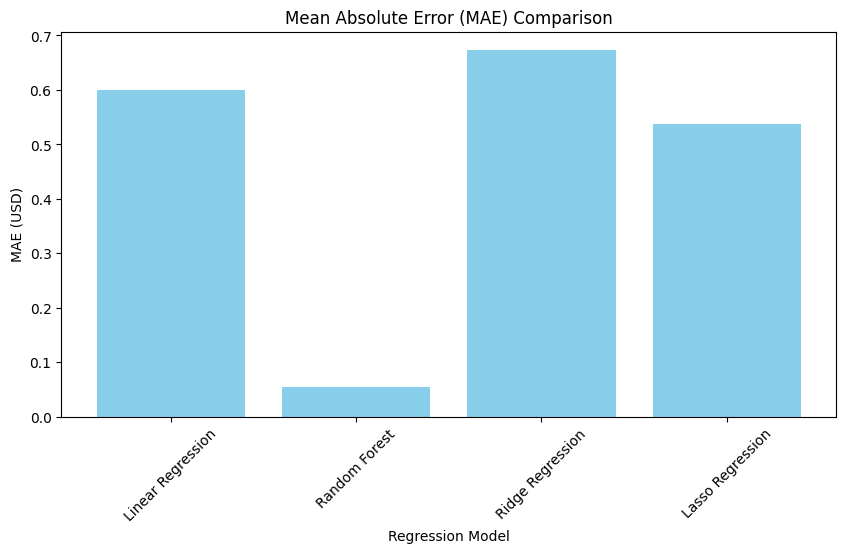

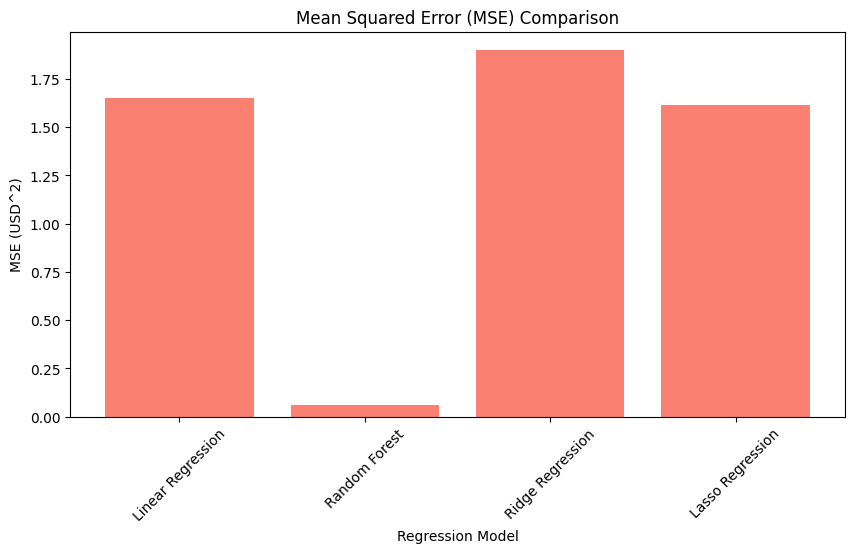

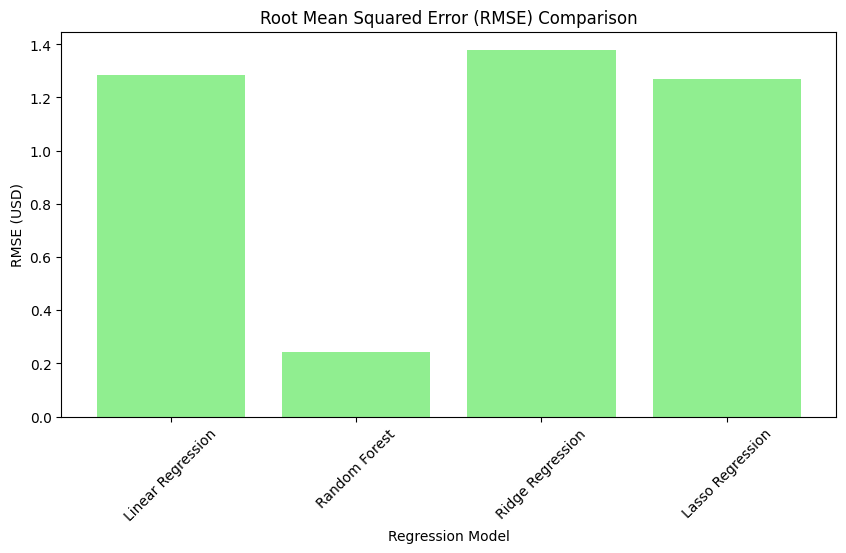

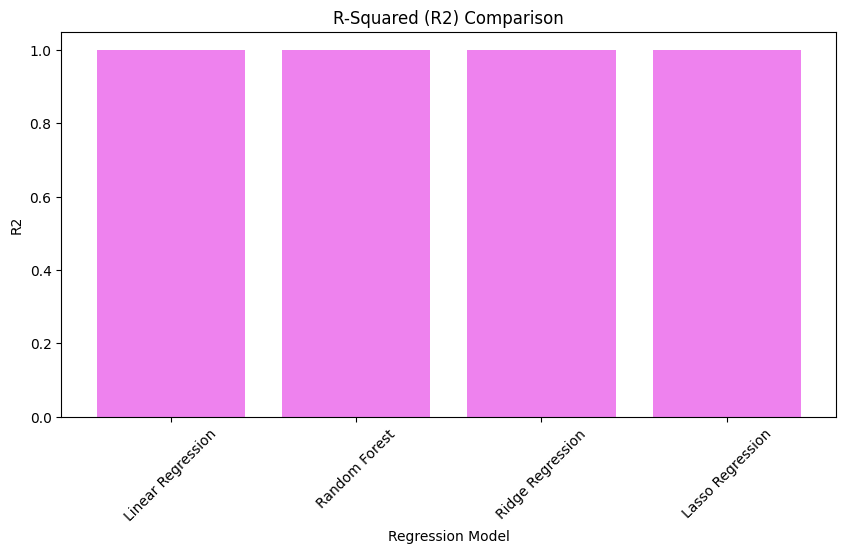

In [5]:
importlib.reload(mu)

# Plotting MAE
mu.plot_metric('Mean Absolute Error (MAE) Comparison', model_names, mae_scores, 'skyblue', 'Regression Model', 'MAE (USD)')

# Plotting MSE
mu.plot_metric('Mean Squared Error (MSE) Comparison', model_names, mse_scores, 'salmon', 'Regression Model', 'MSE (USD^2)')

# Plotting RMSE
mu.plot_metric('Root Mean Squared Error (RMSE) Comparison', model_names, rmse_scores, 'lightgreen', 'Regression Model', 'RMSE (USD)')

# Plotting R2
mu.plot_metric('R-Squared (R2) Comparison', model_names, r2_scores, 'violet', 'Regression Model', 'R2')

## User/Ticker Evluation

In [18]:
importlib.reload(mu)

# Run analytics on each ticker
ticker_predictions = mu.run_analytics(df, 'symbols', 'Ticker', 
                                      text_column, categorical_columns, numerical_columns, 
                                      target_column, 
                                      tfidf_vectorizer, onehot_encoder, scaler, 
                                      models, model_names, 
                                      10)
ticker_predictions = ticker_predictions.sort_values(by='Min MAE', ascending=True)
display(ticker_predictions.head())

# Run analytics on each user
user_predictions = mu.run_analytics(df, 'source', 'Tweet Author', 
                                    text_column, categorical_columns, numerical_columns,
                                    target_column, 
                                    tfidf_vectorizer, onehot_encoder, scaler, 
                                    models, model_names, 
                                    50)
user_predictions = user_predictions.sort_values(by='Min MAE', ascending=True)
display(user_predictions.head())

,Ticker,Tweet Count,Linear Regression MAE,Random Forest MAE,Ridge Regression MAE,Lasso Regression MAE,Min MAE
177,ISRG,83,0.515857,0.0,1.060704,0.943889,0.0
295,SNAP,90,0.171261,0.0,0.191160,0.098936,0.0
289,SIRI,57,0.124085,0.0,0.464293,0.073648,0.0
286,SBUX,49,0.295958,0.0,0.342588,0.232228,0.0
285,SAN,58,0.052985,0.0,0.173910,0.079658,0.0


,Tweet Author,Tweet Count,Linear Regression MAE,Random Forest MAE,Ridge Regression MAE,Lasso Regression MAE,Min MAE
32,carolgibson394,70,0.117413,0.000337,0.150846,0.088242,0.000337
42,melaniebower89a,63,0.110879,0.000634,0.162198,0.096872,0.000634
37,danhodges4591,68,0.092891,0.000828,0.153616,0.100404,0.000828
34,chloeball366,72,0.109900,0.000958,0.137604,0.109154,0.000958
39,evanalsop4864,61,0.088518,0.001028,0.137151,0.083412,0.001028
